<a href="https://colab.research.google.com/github/stonerrb/MisaHub/blob/main/MisaHubResNet_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifying Bleeding and Non-Bleeding Using Resnet**

## **Importing and Splitting**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/WCEBleedGen.zip'
!unzip $zip_path -d MISAHUB

In [ ]:
import os
import shutil

images_folder = '/content/MISAHUB/WCEBleedGen/bleeding/Images'
annotations_folder = '/content/MISAHUB/WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT'
output_folder = '/content/MISAHUB/train/'

# Create the 'train' folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create 'images' and 'labels' folders inside 'train'
images_output_folder = os.path.join(output_folder, 'images')
labels_output_folder = os.path.join(output_folder, 'labels')

os.makedirs(images_output_folder, exist_ok=True)
os.makedirs(labels_output_folder, exist_ok=True)

# Get a list of files in both folders
image_files = os.listdir(images_folder)
annotation_files = os.listdir(annotations_folder)

# Ensure only files with the same base name are considered
image_files = [file for file in image_files if file.endswith('.png')]
annotation_files = [file for file in annotation_files if file.endswith('.txt')]

# Sort the files to ensure consistent numbering
image_files.sort()
annotation_files.sort()

# Rename and move the files to the 'train' folder
for i, (image_file, annotation_file) in enumerate(zip(image_files, annotation_files), start=1):
    # Define the new names for the image and annotation
    new_image_name = f"image_{i}.png"
    new_annotation_name = f"image_{i}.txt"

    # Rename and move the image file
    old_image_path = os.path.join(images_folder, image_file)
    new_image_path = os.path.join(images_output_folder, new_image_name)
    os.rename(old_image_path, new_image_path)

    # Rename and move the annotation file
    old_annotation_path = os.path.join(annotations_folder, annotation_file)
    new_annotation_path = os.path.join(labels_output_folder, new_annotation_name)
    os.rename(old_annotation_path, new_annotation_path)

    print(f"Renamed and moved: {image_file} to {new_image_name}")
    print(f"Renamed and moved: {annotation_file} to {new_annotation_name}")

print("All files have been renamed and moved to the 'train' folder.")


In [ ]:
import os
import shutil

images_folder = '/content/MISAHUB/WCEBleedGen/non-bleeding/images'
output_folder = '/content/MISAHUB/train/'

# Create the 'train' folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create 'images' and 'labels' folders inside 'train'
images_output_folder = os.path.join(output_folder, 'images')
labels_output_folder = os.path.join(output_folder, 'labels')

os.makedirs(images_output_folder, exist_ok=True)
os.makedirs(labels_output_folder, exist_ok=True)

# Get a list of files in the 'images' folder
image_files = os.listdir(images_folder)
image_files = [file for file in image_files if file.endswith('.png')]
image_files.sort()

# Rename and move the files to the 'train' folder
for i, image_file in enumerate(image_files, start=1310):
    # Define the new names for the image and annotation
    new_image_name = f"images_{i}.png"
    new_annotation_name = f"images_{i}.txt"

    # Rename and move the image file
    old_image_path = os.path.join(images_folder, image_file)
    new_image_path = os.path.join(images_output_folder, new_image_name)
    os.rename(old_image_path, new_image_path)

    # Create an empty label file in the 'labels' folder
    new_annotation_path = os.path.join(labels_output_folder, new_annotation_name)
    with open(new_annotation_path, 'w') as empty_file:
        pass

    print(f"Renamed and moved: {image_file} to {new_image_name}")
    print(f"Created empty label file: {new_annotation_name}")

print("All files have been renamed and moved to the 'train' folder.")

In [ ]:
import os
import shutil

# Define the paths to the 'train' directory and its subdirectories
train_dir = 'MISAHUB/train'  # Update this with the actual path to your 'train' directory
images_dir = os.path.join(train_dir, 'images')
labels_dir = os.path.join(train_dir, 'labels')
train_dir = 'MISAHUB/newTrain'
# Create output directories for the two classes
bleeding_dir = os.path.join(train_dir, 'bleeding')
non_bleeding_dir = os.path.join(train_dir, 'non_bleeding')

# Create the 'bleeding' and 'non_bleeding' directories if they don't exist
os.makedirs(bleeding_dir, exist_ok=True)
os.makedirs(non_bleeding_dir, exist_ok=True)

# Iterate through the files in the 'images' directory
for image_filename in os.listdir(images_dir):
    # Form the corresponding label file path
    label_filename = os.path.splitext(image_filename)[0] + '.txt'
    label_filepath = os.path.join(labels_dir, label_filename)

    # Check if the label file is empty (indicating non-bleeding)
    if os.path.exists(label_filepath) and os.path.getsize(label_filepath) == 0:
        # Move the image to the 'non_bleeding' directory
        shutil.move(os.path.join(images_dir, image_filename), os.path.join(non_bleeding_dir, image_filename))
    else:
        # Move the image to the 'bleeding' directory
        shutil.move(os.path.join(images_dir, image_filename), os.path.join(bleeding_dir, image_filename))

print("Dataset organized into 'bleeding' and 'non_bleeding' classes.")


Dataset organized into 'bleeding' and 'non_bleeding' classes.


In [ ]:
! ls MISAHUB/newTrain/bleeding | wc -l

1309


In [ ]:
import os
import random
import shutil

bleeding_dir = '/content/MISAHUB/newTrain/bleeding'
non_bleeding_dir = '/content/MISAHUB/newTrain/non_bleeding'


bleeding_files = os.listdir(bleeding_dir)

non_bleeding_files = os.listdir(non_bleeding_dir)

labels={}
for files in bleeding_files:
    labels[files] = 0
for files in non_bleeding_files:
    labels[files] = 1


In [ ]:
#Merging bleeding and non_bleeding
import os
import random
import shutil

# Define the source folders and the destination folders
bleeding_folder = '/content/MISAHUB/newTrain/bleeding'
non_bleeding_folder = '/content/MISAHUB/newTrain/non_bleeding'
merged_folder = '/content/classification/merged'
train_folder = '/content/classification/train'
val_folder = '/content/classification/val'
if not os.path.exists(merged_folder):
    os.makedirs(merged_folder)
# Ensure the destination folders exist or create them if they don't
if not os.path.exists(train_folder):
    os.makedirs(train_folder)

if not os.path.exists(val_folder):
    os.makedirs(val_folder)

# Merge the contents of the "bleeding" folder into the merged folder
for item in os.listdir(bleeding_folder):
    source_item = os.path.join(bleeding_folder, item)
    destination_item = os.path.join(merged_folder, item)
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item)
    else:
        shutil.copy2(source_item, destination_item)

# Merge the contents of the "non-bleeding" folder into the merged folder
for item in os.listdir(non_bleeding_folder):
    source_item = os.path.join(non_bleeding_folder, item)
    destination_item = os.path.join(merged_folder, item)
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item)
    else:
        shutil.copy2(source_item, destination_item)

# Get a list of all files in the merged folder
all_files = os.listdir(merged_folder)

# Calculate the number of files for the training set and validation set
num_files = len(all_files)
num_train = int(0.8 * num_files)
num_val = num_files - num_train

# Randomly shuffle the list of files
random.shuffle(all_files)

# Split the files into training and validation sets
train_files = all_files[:num_train]
val_files = all_files[num_train:]

# Copy the training and validation files to their respective folders
for file in train_files:
    source_file = os.path.join(merged_folder, file)
    destination_file = os.path.join(train_folder, file)
    shutil.copy2(source_file, destination_file)

for file in val_files:
    source_file = os.path.join(merged_folder, file)
    destination_file = os.path.join(val_folder, file)
    shutil.copy2(source_file, destination_file)

print(f"Folders '{bleeding_folder}' and '{non_bleeding_folder}' have been merged into '{merged_folder}'.")
print(f"The merged dataset has been split into {len(train_files)} training samples and {len(val_files)} validation samples.")


Folders '/content/MISAHUB/newTrain/bleeding' and '/content/MISAHUB/newTrain/non_bleeding' have been merged into '/content/classification/merged'.
The merged dataset has been split into 2094 training samples and 524 validation samples.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
import tensorflow as tf
import os

# Define the path to the 'merged' directory
merged_dir = 'classification/merged'

# Load the labels from your 'labels' dictionary
# Assuming you have a 'labels' dictionary defined

# Get a list of all image file paths in the 'merged' directory
image_file_paths = [os.path.join(merged_dir, filename) for filename in os.listdir(merged_dir)]

# Create empty lists to store file paths for training and validation
train_file_paths = []
val_file_paths = []

# Define a function to load an image and its label
def load_image(file_path, label):
    # Load the image
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)  # Adjust channels as needed
    img = tf.image.resize(img, (224, 224))  # Adjust image size as needed

    return img, label

# Create a dataset from the image file paths and labels
dataset = tf.data.Dataset.from_tensor_slices((image_file_paths, [labels[os.path.basename(path)] for path in image_file_paths]))

# Load the images and labels in parallel
AUTOTUNE = tf.data.AUTOTUNE
dataset = dataset.map(lambda x, y: (load_image(x, y)), num_parallel_calls=AUTOTUNE)

# Shuffle the dataset
dataset = dataset.shuffle(buffer_size=len(image_file_paths))

# Calculate the total number of samples in the dataset
total_samples = len(image_file_paths)

# Calculate the number of samples for training and validation
train_size = int(0.8 * total_samples)
val_size = total_samples - train_size

# Split the dataset into training and validation datasets and keep track of file paths
for i, (image, label) in enumerate(dataset):
    if i < train_size:
        train_file_paths.append(image_file_paths[i])
    else:
        val_file_paths.append(image_file_paths[i])

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

# Batch the datasets
batch_size = 32  # Adjust the batch size as needed
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)

# Optionally, prefetch data for better performance
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)


## **Classification ResNet**

In [ ]:
from tensorflow.keras.regularizers import l2
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',classes=2,
                   weights='imagenet')
# for layer in pretrained_model.layers:
#         layer.trainable=False
# Unfreeze specific layers
for layer in pretrained_model.layers:
    if layer.name in ['block4_conv1', 'block4_conv2', 'block4_conv3']:
        layer.trainable = True
    else:
        layer.trainable = False

# Compile the model after unfreezing layers
# resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.02)))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.02)))

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
resnet_model.summary()

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=[tf.keras.metrics.Recall()])

In [ ]:
import torch
import torchvision
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
epochs=5
batch_size=32


history = resnet_model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/5
66/66 [==============================] - 34s 220ms/step - loss: 2.7757 - recall: 0.7769 - val_loss: 0.1563 - val_recall: 0.9474
Epoch 2/5
66/66 [==============================] - 15s 179ms/step - loss: 0.1895 - recall: 0.9402 - val_loss: 0.0884 - val_recall: 0.9783
Epoch 3/5
66/66 [==============================] - 16s 178ms/step - loss: 0.1176 - recall: 0.9634 - val_loss: 0.1617 - val_recall: 1.0000
Epoch 4/5
66/66 [==============================] - 18s 195ms/step - loss: 0.1167 - recall: 0.9537 - val_loss: 0.0468 - val_recall: 0.9964
Epoch 5/5
66/66 [==============================] - 17s 204ms/step - loss: 0.0774 - recall: 0.9731 - val_loss: 0.0293 - val_recall: 0.9925


In [ ]:
img = tf.keras.preprocessing.image.load_img("/content/MISAHUB/newTrain/bleeding/image_84.png", target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.expand_dims(img, axis=0)

predictions = resnet_model.predict(img)
if(predictions[0][0])<0.5:
    print("bleeding")
else:
    print("non_bleeding")

1/1 [==============================] - 2s 2s/step
bleeding


## **Evaluating Model**

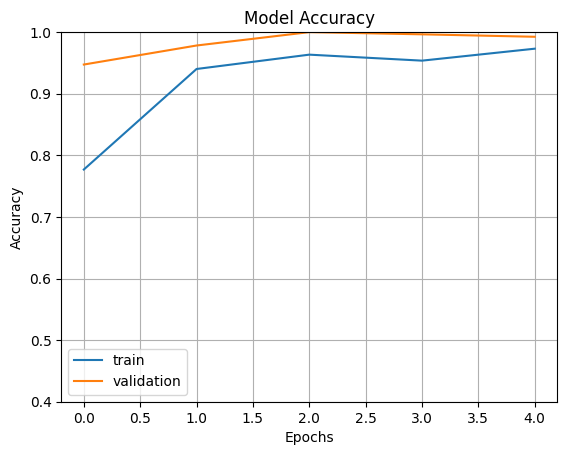

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
true_predictions = []
for x in val_file_paths:
    true_predictions.append(labels[x.split('/')[2]])
true_predictions

## Saving the classifying Model:

In [ ]:
resnet_model.save("/content/drive/My Drive/models/resnet_model_MISAHUB")

## Testing the classification model

In [120]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

binary_val_predictions=[]
for x in val_file_paths:
    img = tf.keras.preprocessing.image.load_img(x, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.expand_dims(img, axis=0)

    predictions = resnet_model.predict(img)
    if(predictions[0][0])<0.5:
        binary_val_predictions.append(0)
    else:
        binary_val_predictions.append(1)

# Calculate accuracy
train_accuracy = accuracy_score(true_predictions, binary_val_predictions)

# Calculate precision
train_precision = precision_score(true_predictions, binary_val_predictions)

# Calculate recall
train_recall = recall_score(true_predictions, binary_val_predictions)

# # Print the results
print(f'Validation Accuracy: {train_accuracy:.2f}')
print(f'Validation Precision: {train_precision:.2f}')
print(f'Validation Recall: {train_recall:.2f}')


1/1 [==============================] - 0s 29ms/step
Validation Accuracy: 0.99
Validation Precision: 1.00
Validation Recall: 0.99


In [121]:
f1score = (2*train_precision*train_recall)/(train_precision+train_recall)
print(f'F1 Score: {f1score:.2f}')

F1 Score: 0.99


In [ ]:
zip_path = "/content/drive/MyDrive/Auto-WCEBleedGen\ Challenge\ Test\ Dataset.zip"
!unzip $zip_path -d Test

# Detection on Bleeding Frames

In [ ]:
from tensorflow import keras
classifier = keras.models.load_model('/content/drive/My Drive/models/resnet_model_MISAHUB')

Now we will train the model for detection. For this we will use only the bleeding images and their annotations from the **MISAHUB/WCEBleedGen/bleeding** directory.</br>
images: "/content/MISAHUB/WCEBleedGen/bleeding/Images"</br>
bounding_boxes =  "/content/MISAHUB/WCEBleedGen/bleeding/Bounding\ boxes/XML"

In [ ]:
zip_path = '/content/drive/MyDrive/WCEBleedGen.zip'
!unzip $zip_path -d MISAHUB

In [ ]:
%cd /content

/content


In [ ]:
import os
import random
import shutil

# Define the paths to the source directories
images_dir = '/content/MISAHUB/WCEBleedGen/bleeding/Images'
yolo_dir = '/content/MISAHUB/WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT'

# Define the paths for train and val (validation) directories
train_dir = 'train_data'
val_dir = 'val_data'

# Create the train and val (validation) directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Define subdirectories for "images" and "labels"
subdirs = ['images', 'labels']

# Create subdirectories for the train and val (validation) datasets
for subdir in subdirs:
    os.makedirs(os.path.join(train_dir, subdir), exist_ok=True)
    os.makedirs(os.path.join(val_dir, subdir), exist_ok=True)

# List all the image files
image_files = os.listdir(images_dir)

# Shuffle the files randomly
random.shuffle(image_files)

# Calculate the split sizes
total_samples = len(image_files)
train_size = int(0.8 * total_samples)
val_size = total_samples - train_size

# Define a function to move image and XML files to the specified directory
def move_files(source_dir, destination_dir, subdir, file_list):
    for file_name in file_list:
        source_path = os.path.join(source_dir, file_name)
        destination_path = os.path.join(destination_dir, subdir, file_name)
        shutil.copy(source_path, destination_path)

# Move files to train directory
move_files(images_dir, train_dir, 'images', image_files[:train_size])
move_files(yolo_dir, train_dir, 'labels', [file.replace('.png', '.txt') for file in image_files[:train_size]])

# Move files to val (validation) directory
move_files(images_dir, val_dir, 'images', image_files[train_size:])
move_files(yolo_dir, val_dir, 'labels', [file.replace('.png', '.txt') for file in image_files[train_size:]])

print("Dataset split into train and val (validation) sets with an 80-20 split.")


Dataset split into train and val (validation) sets with an 80-20 split.


## Yolov5


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

In [ ]:
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.1+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [ ]:
!touch data.yaml

In [ ]:
%cd ..

/content


In [ ]:
!python yolov5/train.py --epochs 50 --data yolov5/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=yolov5/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_

In [124]:
!python yolov5/detect.py --weights /content/yolov5/runs/train/exp5/weights/best.pt --source /content/yolov5/val_data/images --save-txt --save-conf

detect: weights=['/content/yolov5/runs/train/exp5/weights/best.pt'], source=/content/yolov5/val_data/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/262 /content/yolov5/val_data/images/img- (1).png: 640x640 (no detections), 11.5ms
image 2/262 /content/yolov5/val_data/images/img- (100).png: 640x640 1 bleeding, 11.5ms
image 3/262 /content/yolov5/val_data/images/img- (1004).png: 640x640 2 bleedings, 11.6ms
image 4/262 /content/yo

In [128]:
import numpy as np

def parse_yolo_label(label):
    """Parse YOLO label string into a list of values."""
    values = label.strip().split()
    class_id = int(values[0])
    confidence = float(values[-1])
    box = [float(values[1]), float(values[2]), float(values[3]), float(values[4])]
    return class_id, confidence, box

def calculate_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1_, y1_, x2_, y2_ = box2

    x_intersection = max(0, min(x2, x2_) - max(x1, x1_))
    y_intersection = max(0, min(y2, y2_) - max(y1, y1_))
    intersection_area = x_intersection * y_intersection

    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2_ - x1_) * (y2_ - y1_)
    union_area = box1_area + box2_area - intersection_area

    IoU = intersection_area / union_area

    return IoU

def calculate_average_precision(yolo_labels, ground_truth, class_id, confidence_threshold=0.5):
    precision_list = []
    recall_list = []

    for i in range(len(yolo_labels)):
        yolo_label = yolo_labels[i]
        target = ground_truth[i]

        if yolo_label[5] == class_id:
            if yolo_label[4] >= confidence_threshold:
                true_positives = 0
                false_positives = 0
                total_objects = 0

                for t in target:
                    if t[4] == class_id:
                        total_objects += 1
                        iou = calculate_iou(yolo_label[1:5], t[1:5])
                        if iou >= 0.5:
                            true_positives += 1

                false_positives = max(0, total_objects - true_positives)
                precision = true_positives / (true_positives + false_positives)
                recall = true_positives / total_objects

                precision_list.append(precision)
                recall_list.append(recall)

    interpolated_precision = np.linspace(0, 1, num=101)
    interpolated_recall = np.zeros_like(interpolated_precision)

    for i in range(len(precision_list)):
        precision = precision_list[i]
        recall = recall_list[i]

        for j in range(len(interpolated_precision)):
            interpolated_recall[j] += np.max(recall[precision >= interpolated_precision[j]])

    interpolated_recall /= len(precision_list)
    ap = np.trapz(interpolated_recall, interpolated_precision)

    return ap

# Example usage
if __name__ == "__main__":
    # Load YOLO labels and ground truth annotations
    yolo_labels = [...]  # List of YOLO labels as strings
    ground_truth = [...]  # List of ground truth annotations (list of tensors or labels)

    class_id = 0  # Specify the class ID for which AP is calculated

    # Parse YOLO labels and convert them to the required format
    yolo_predictions = []
    for label in yolo_labels:
        class_id, confidence, box = parse_yolo_label(label)
        yolo_predictions.append([class_id, box[0], box[1], box[2], box[3], confidence])

    # Calculate AP for the specified class
    ap = calculate_average_precision(yolo_predictions, ground_truth, class_id)

    print(f"Average Precision (AP) for class {class_id}: {ap:.4f}")


ValueError: ignored

In [126]:
import os
iou_values=[]
exp='exp10'

# Function to parse YOLO bounding box format
def parse_yolo_box(yolo_box_str):
    values = yolo_box_str.strip().split()
    class_id = int(values[0])
    x_center, y_center, width, height = map(float, values[1:])
    return class_id, x_center, y_center, width, height

# Function to calculate IoU
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    x_intersection = max(x1 - w1 / 2, x2 - w2 / 2)
    y_intersection = max(y1 - h1 / 2, y2 - h2 / 2)
    w_intersection = min(x1 + w1 / 2, x2 + w2 / 2) - x_intersection
    h_intersection = min(y1 + h1 / 2, y2 + h2 / 2) - y_intersection

    if w_intersection <= 0 or h_intersection <= 0:
        return 0.0

    area_intersection = w_intersection * h_intersection
    area_box1 = w1 * h1
    area_box2 = w2 * h2

    iou = area_intersection / (area_box1 + area_box2 - area_intersection)
    return iou

# Folder paths for predicted and ground truth label text files
predicted_folder = '/content/yolov5/runs/detect/'+exp+'/labels'
ground_truth_folder = '/content/yolov5/val_data/labels'

# Iterate through files in the predicted folder
for filename in os.listdir(ground_truth_folder):
    if filename.endswith('.txt'):
        predicted_filepath = os.path.join(predicted_folder, filename)
        ground_truth_filepath = os.path.join(ground_truth_folder, filename)

        # Check if the corresponding ground truth file exists
        if not os.path.exists(predicted_filepath):
            print(f"No detections in {filename}")
            iou_values.append(0)
            continue

        with open(predicted_filepath, 'r') as predicted_file, open(ground_truth_filepath, 'r') as ground_truth_file:
            predicted_lines = predicted_file.readlines()
            ground_truth_lines = ground_truth_file.readlines()

            # Ensure the same number of lines in both files
            if len(predicted_lines) != len(ground_truth_lines):
                print(f"Error: Number of boxes in {filename} doesn't match.")
                continue

            # Parse and compare each pair of boxes
            for predicted_line, ground_truth_line in zip(predicted_lines, ground_truth_lines):
                predicted_box = parse_yolo_box(predicted_line)
                ground_truth_box = parse_yolo_box(ground_truth_line)

                # Calculate IoU for the pair of boxes
                iou = calculate_iou(predicted_box[1:], ground_truth_box[1:])
                iou_values.append(iou)
                print(f"IoU for {filename}: {iou}")

# You can further process the IoU values as needed (e.g., calculate metrics).

No detections in img- (959).txt


ValueError: ignored

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have lists of IoU values and confidence scores
# iou_values = [...]  # List of IoU values for all predictions
confidence_scores = [...]  # List of confidence scores for all predictions
class_ids = [1]  # List of class IDs corresponding to each prediction

# Calculate AP and mAP for each class separately
ap_dict = {}
for class_id in set(class_ids):
    # Filter predictions for the current class
    class_iou_values = [iou for iou, cid in zip(iou_values, class_ids) if cid == class_id]
    class_confidence_scores = [score for score, cid in zip(confidence_scores, class_ids) if cid == class_id]

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_true=class_iou_values, probas_pred=class_confidence_scores)

    # Compute Average Precision (AP) for IoU threshold (e.g., 0.5 or 0.75)
    ap = average_precision_score(y_true=class_iou_values, y_score=class_confidence_scores)

    ap_dict[class_id] = ap

# Compute Mean Average Precision (mAP) as the average of AP values across all classes
mAP = sum(ap_dict.values()) / len(ap_dict)

# Print AP values for each class and mAP
for class_id, ap in ap_dict.items():
    print(f"Class {class_id} AP: {ap}")
print(f"Mean Average Precision (mAP): {mAP}")

In [131]:
import os
iou_values=[]
exp='exp6'
# Function to parse YOLO bounding box format
def parse_yolo_box(yolo_box_str):
    values = yolo_box_str.strip().split()
    class_id = int(values[0])
    x_center, y_center, width, height = map(float, values[1:])
    return class_id, x_center, y_center, width, height

# Function to calculate IoU
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    x_intersection = max(x1 - w1 / 2, x2 - w2 / 2)
    y_intersection = max(y1 - h1 / 2, y2 - h2 / 2)
    w_intersection = min(x1 + w1 / 2, x2 + w2 / 2) - x_intersection
    h_intersection = min(y1 + h1 / 2, y2 + h2 / 2) - y_intersection

    if w_intersection <= 0 or h_intersection <= 0:
        return 0.0

    area_intersection = w_intersection * h_intersection
    area_box1 = w1 * h1
    area_box2 = w2 * h2

    iou = area_intersection / (area_box1 + area_box2 - area_intersection)
    return iou

# Folder paths for predicted and ground truth label text files
predicted_folder = '/content/yolov5/runs/detect/'+exp+'/labels'
ground_truth_folder = '/content/yolov5/val_data/labels'

# Iterate through files in the predicted folder
for filename in os.listdir(ground_truth_folder):
    if filename.endswith('.txt'):
        predicted_filepath = os.path.join(predicted_folder, filename)
        ground_truth_filepath = os.path.join(ground_truth_folder, filename)

        # Check if the corresponding ground truth file exists
        if not os.path.exists(predicted_filepath):
            print(f"No detections in {filename}")
            iou_values.append(0)
            continue

        with open(predicted_filepath, 'r') as predicted_file, open(ground_truth_filepath, 'r') as ground_truth_file:
            predicted_lines = predicted_file.readlines()
            ground_truth_lines = ground_truth_file.readlines()

            # Ensure the same number of lines in both files
            if len(predicted_lines) != len(ground_truth_lines):
                print(f"Error: Number of boxes in {filename} doesn't match.")
                continue

            # Parse and compare each pair of boxes
            for predicted_line, ground_truth_line in zip(predicted_lines, ground_truth_lines):
                predicted_box = parse_yolo_box(predicted_line)
                ground_truth_box = parse_yolo_box(ground_truth_line)

                # Calculate IoU for the pair of boxes
                iou = calculate_iou(predicted_box[1:], ground_truth_box[1:])
                iou_values.append(iou)
                print(f"IoU for {filename}: {iou}")

# You can further process the IoU values as needed (e.g., calculate metrics).

No detections in img- (959).txt
IoU for img- (651).txt: 0.4887215639039998
No detections in img- (110).txt
IoU for img- (599).txt: 0.0
IoU for img- (411).txt: 0.7427149310087174
No detections in img- (868).txt
IoU for img- (898).txt: 0.022860280490041747
IoU for img- (1005).txt: 0.532960154589691
IoU for img- (591).txt: 0.38659865249670616
IoU for img- (556).txt: 0.8753892815533982
No detections in img- (245).txt
IoU for img- (534).txt: 0.5813753989378394
No detections in img- (363).txt
IoU for img- (410).txt: 0.9249389104002552
IoU for img- (442).txt: 0.9063953000689938
No detections in img- (338).txt
IoU for img- (617).txt: 0.9189194499310168
IoU for img- (1062).txt: 0.7878760697941888
No detections in img- (258).txt
IoU for img- (701).txt: 0.9844355583200286
IoU for img- (941).txt: 0.4879769183350919
No detections in img- (191).txt
No detections in img- (962).txt
No detections in img- (1178).txt
IoU for img- (812).txt: 0.9701381804891197
IoU for img- (609).txt: 0.886466286280414
No 

In [135]:
sum(iou_values)/len(iou_values)

0.4434957849274505

## Testing

In [ ]:
!unzip "/content/drive/MyDrive/Auto-WCEBleedGen Challenge Test Dataset.zip" -d testing

In [ ]:
test_dataset1= "/content/testing/Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1"
bleeding_data1=[]
non_bleeding_data1=[]
for file_name in os.listdir(test_dataset1):
  img = tf.keras.preprocessing.image.load_img(os.path.join(test_dataset1,file_name), target_size=(224, 224))
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = tf.expand_dims(img, axis=0)
  classification = resnet_model.predict(img)
  print(classification[0][0])
  if classification[0][0] < 0.5 :
    print("Bleeding")
    bleeding_data1.append(file_name)
    # !python ../yolov5/detect.py --source "C:\Programming\MISAHUB\Images\\b_img- (1008).png" --weights best(1).pt --save-txt --project .
  else:
    non_bleeding_data1.append(file_name)
    print("Non Bleeding image")



1/1 [==============================] - 0s 34ms/step
0.9977297
Non Bleeding image
1/1 [==============================] - 0s 35ms/step
0.8515207
Non Bleeding image
1/1 [==============================] - 0s 31ms/step
0.92515326
Non Bleeding image
1/1 [==============================] - 0s 41ms/step
0.9740984
Non Bleeding image
1/1 [==============================] - 0s 24ms/step
0.9805233
Non Bleeding image
1/1 [==============================] - 0s 23ms/step
0.8605354
Non Bleeding image
1/1 [==============================] - 0s 25ms/step
0.9999732
Non Bleeding image
1/1 [==============================] - 0s 28ms/step
0.999801
Non Bleeding image
1/1 [==============================] - 0s 28ms/step
0.8055139
Non Bleeding image
1/1 [==============================] - 0s 30ms/step
0.98124963
Non Bleeding image
1/1 [==============================] - 0s 26ms/step
0.92984545
Non Bleeding image
1/1 [==============================] - 0s 27ms/step
0.8526661
Non Bleeding image
1/1 [=====================

In [ ]:
bleeding_data1

['A0047.png', 'A0038.png', 'A0001.png', 'A0003.png', 'A0040.png']

In [ ]:
import os
import shutil

# List of file names to copy
# bleeding_data1 = ["file1.jpg", "file2.jpg", "file3.jpg"]  # Replace with your file names

# Create the target directory if it doesn't exist
target_directory = "bleeding_data1"
os.makedirs(target_directory, exist_ok=True)

# Source directory containing the files
source_directory = "/content/testing/Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1"  # Replace with your source directory path

# Iterate through the file names and copy them to the target directory
for file_name in bleeding_data1:
    source_path = os.path.join(source_directory, file_name)
    target_path = os.path.join(target_directory, file_name)

    try:
        shutil.copy(source_path, target_path)
        print(f"Copied {file_name} to {target_directory}")
    except FileNotFoundError:
        print(f"File {file_name} not found in the source directory.")

print("Copying completed.")


Copied A0047.png to bleeding_data1
Copied A0038.png to bleeding_data1
Copied A0001.png to bleeding_data1
Copied A0003.png to bleeding_data1
Copied A0040.png to bleeding_data1
Copying completed.


In [ ]:
!python yolov5/detect.py --weights /content/yolov5/runs/train/exp5/weights/best.pt --source bleeding_data1 --save-txt --save-conf

detect: weights=['/content/yolov5/runs/train/exp5/weights/best.pt'], source=bleeding_data1, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/bleeding_data1/A0001.png: 640x640 1 bleeding, 11.5ms
image 2/5 /content/bleeding_data1/A0003.png: 640x640 1 bleeding, 11.6ms
image 3/5 /content/bleeding_data1/A0038.png: 640x640 (no detections), 13.2ms
image 4/5 /content/bleeding_data1/A0040.png: 640x640 1 bleeding, 11.5ms
image 5/5 /co

# Test 2

In [ ]:
test_dataset2= "/content/testing/Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 2"
bleeding_data2=[]
non_bleeding_data2=[]
for file_name in os.listdir(test_dataset2):
  img = tf.keras.preprocessing.image.load_img(os.path.join(test_dataset2,file_name), target_size=(224, 224))
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = tf.expand_dims(img, axis=0)
  classification = resnet_model.predict(img)
  print(classification[0][0])
  if classification[0][0] < 0.5 :
    print("Bleeding")
    bleeding_data2.append(file_name)
    # !python ../yolov5/detect.py --source "C:\Programming\MISAHUB\Images\\b_img- (1008).png" --weights best(1).pt --save-txt --project .
  else:
    non_bleeding_data2.append(file_name)
    print("Non Bleeding image")

1/1 [==============================] - 0s 24ms/step
0.5605878
Non Bleeding image
1/1 [==============================] - 0s 21ms/step
0.99996054
Non Bleeding image
1/1 [==============================] - 0s 23ms/step
0.9961612
Non Bleeding image
1/1 [==============================] - 0s 27ms/step
0.051810574
Bleeding
1/1 [==============================] - 0s 21ms/step
0.19632779
Bleeding
1/1 [==============================] - 0s 21ms/step
0.86236984
Non Bleeding image
1/1 [==============================] - 0s 24ms/step
0.20356205
Bleeding
1/1 [==============================] - 0s 26ms/step
0.5268939
Non Bleeding image
1/1 [==============================] - 0s 25ms/step
0.99114436
Non Bleeding image
1/1 [==============================] - 0s 23ms/step
0.33491045
Bleeding
1/1 [==============================] - 0s 26ms/step
0.055617135
Bleeding
1/1 [==============================] - 0s 23ms/step
0.29319757
Bleeding
1/1 [==============================] - 0s 27ms/step
0.95742375
Non Bleeding i

In [ ]:
len(bleeding_data2)

283

In [ ]:
import os
import shutil

# List of file names to copy
# bleeding_data1 = ["file1.jpg", "file2.jpg", "file3.jpg"]  # Replace with your file names

# Create the target directory if it doesn't exist
target_directory = "bleeding_data2"
os.makedirs(target_directory, exist_ok=True)

# Source directory containing the files
source_directory = "/content/testing/Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 2"  # Replace with your source directory path

# Iterate through the file names and copy them to the target directory
for file_name in bleeding_data2:
    source_path = os.path.join(source_directory, file_name)
    target_path = os.path.join(target_directory, file_name)

    try:
        shutil.copy(source_path, target_path)
        print(f"Copied {file_name} to {target_directory}")
    except FileNotFoundError:
        print(f"File {file_name} not found in the source directory.")

print("Copying completed.")


Copied A0244.png to bleeding_data2
Copied A0235.png to bleeding_data2
Copied A0393.png to bleeding_data2
Copied A0116.png to bleeding_data2
Copied A0360.png to bleeding_data2
Copied A0346.png to bleeding_data2
Copied A0516.png to bleeding_data2
Copied A0223.png to bleeding_data2
Copied A0090.png to bleeding_data2
Copied A0482.png to bleeding_data2
Copied A0188.png to bleeding_data2
Copied A0138.png to bleeding_data2
Copied A0144.png to bleeding_data2
Copied A0146.png to bleeding_data2
Copied A0525.png to bleeding_data2
Copied A0149.png to bleeding_data2
Copied A0219.png to bleeding_data2
Copied A0422.png to bleeding_data2
Copied A0186.png to bleeding_data2
Copied A0156.png to bleeding_data2
Copied A0380.png to bleeding_data2
Copied A0354.png to bleeding_data2
Copied A0063.png to bleeding_data2
Copied A0556.png to bleeding_data2
Copied A0562.png to bleeding_data2
Copied A0154.png to bleeding_data2
Copied A0396.png to bleeding_data2
Copied A0405.png to bleeding_data2
Copied A0241.png to 

In [ ]:
!python yolov5/detect.py --weights /content/yolov5/runs/train/exp5/weights/best.pt --source bleeding_data2 --save-txt --save-conf

detect: weights=['/content/yolov5/runs/train/exp5/weights/best.pt'], source=bleeding_data2, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/283 /content/bleeding_data2/A0050.png: 640x640 (no detections), 11.5ms
image 2/283 /content/bleeding_data2/A0062.png: 640x640 (no detections), 11.5ms
image 3/283 /content/bleeding_data2/A0063.png: 640x640 (no detections), 11.5ms
image 4/283 /content/bleeding_data2/A0069.png: 640x640 (no detections

In [ ]:
import os

# Function to extract the last value from a line
def extract_last_value(line):
    values = line.strip().split()
    if values:
        return float(values[-1])
    return 0.0  # Return 0.0 if the line is empty or doesn't have a valid last value

# Directory containing the text files
directory = '/content/yolov5/runs/detect/exp8/labels'  # Replace with your directory path

# List of text files in the directory
text_files = [f for f in os.listdir(directory) if f.endswith('.txt')]

# Sort the text files based on the last value
sorted_text_files = sorted(text_files, key=lambda file_name: extract_last_value(open(os.path.join(directory, file_name)).readlines()[-1]), reverse=True)

# Print only the top five sorted file names
top_five_sorted_text_files = sorted_text_files[:5]
print("Top five sorted text files:", top_five_sorted_text_files)


Top five sorted text files: ['A0333.txt', 'A0403.txt', 'A0360.txt', 'A0268.txt', 'A0145.txt']


In [ ]:
from IPython.display import Image, display
import os

# Directory containing the images
image_dir = '/content/yolov5/runs/detect/exp8'

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Display each image using IPython.display
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    display(Image(filename=image_path))


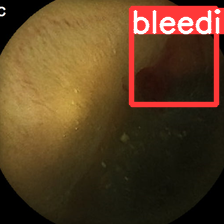

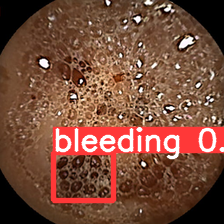

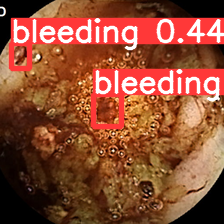

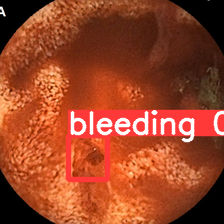

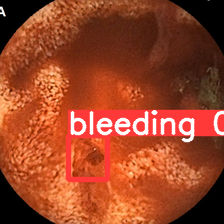

In [116]:
from IPython.display import Image, display
import os

# Directory containing the images
image_dir = '/content/yolov5/runs/detect/exp8'

# List of file names to display with .txt extension
# top_five_sorted_text_files = ["A0333.txt", "file2.txt", "file3.txt", "file4.txt", "file5.txt"]  # Replace with your top five file names

# Display images for the specified file names with .png extension
for text_file in top_five_sorted_text_files:
    # Change the file extension from .txt to .png
    image_file = os.path.splitext(text_file)[0] + ".png"
    image_path = os.path.join(image_dir, image_file)

    if os.path.exists(image_path):
        display(Image(filename=image_path))
    else:
        print(f"Image not found: {image_path}")


# Evaluation Metriss

## Classification